# Problem Statement
Create an standardized index to catagorize the risk level of covid-19 spread in communities. It would help Based on the paper *A COVID-19 Reopening Readiness Index: The Key to Opening up the Economy*

Reference paper: __[A COVID-19 Reopening Readiness Index: The Key to Opening up the Economy](https://www.medrxiv.org/content/10.1101/2020.05.22.20110577v2.full.pdf)__

variables:
- mortality
- hospitalizations
- testing capacity
- number of infections
- infection rate

Other papers about reopening readiness
- __[Using random testing in a feedback-control loop to manage a safe exit from the
COVID-19 lockdown](https://www.medrxiv.org/content/10.1101/2020.04.09.20059360v2.full.pdf)__

In [32]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt # matplotlib.pyplot plots data

%matplotlib inline

**Data from John Hopkins Whiting School of Engineering** <br>
Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE<br>
URL: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19)

**The COVID Tracking Project**<br>
URL: [US data](https://covidtracking.com/data/download)

We are using the state data. Deprecated variables are:
* checkTimeEt
* commercialScore
* dateChecked
* dateModified
* grade
* hash
* hospitalized
* negativeIncrease
* negativeRegularScore
* negativeScore
* posNeg
* positiveScore
* score
* total

**Metadata**

| variable | type | description | Nulls? |
|:-|:-|:-|:-|
| dataQualityGrade | string | The COVID Tracking Project grade of the completeness of the data reporting by a state. | No |
| date | integer | Date on which data was collected by The COVID Tracking Project. | No |
| death | integer | Total fatalities with confirmed OR probable COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/)). In states where the information is available, it only tracks fatalities with confirmed OR probable COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| deathConfirmed | integer | Total fatalities with confirmed COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/)). In states where the information is available, it only tracks fatalities with confirmed COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| deathIncrease | integer | Daily difference in death | Yes |
| deathProbable | integer | Total fatalities with probable COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). In states where the information is available, it only tracks fatalities with probable COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| fips | integer | Federal Information Processing Standards (FIPS) code for the state or territory. | Yes |
| hospitalizedCumulative | integer | Total number of individuals who have ever been hospitalized with COVID-19. Definitions vary by state / territory. Where possible, we report hospitalizations with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | No |
| hospitalizedCurrently | integer | Individuals who are currently hospitalized with COVID-19. Definitions vary by state / territory. Where possible, we report hospitalizations with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| hospitalizedIncrease | integer | Daily difference in hospitalized | Yes |
| inIcuCumulative | integer | Total number of individuals who have ever been hospitalized in the Intensive Care Unit with COVID-19. Definitions vary by state / territory. Where possible, we report patients in the ICU with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| inIcuCurrently | integer | Individuals who are currently hospitalized in the Intensive Care Unit with COVID-19. Definitions vary by state / territory. Where possible, we report patients in the ICU with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| lastUpdateEt | string | Date and time in Eastern time the state or territory last updated the data. | No |
| negative | integer | Individuals with a completed viral test that returned a negative result. For states / territories that do not report this number directly, we compute it using one of several methods, depending on which data points the state provides. | Yes |
| negativeTestsViral | integer | Completed viral tests that returned negative results. | Yes |
| onVentilatorCumulative | integer | Total number of individuals who have ever been hospitalized under advanced ventilation with COVID-19. Definitions vary by state / territory. Where possible, we report patients on ventilation with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| onVentilatorCurrently | integer | Individuals who are currently hospitalized under advanced ventilation with COVID-19. Definitions vary by state / territory. Where possible, we report patients on ventilation with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| pending | integer | Tests whose results have not yet been reported. | Yes |
| positive | integer | Individuals with confirmed or probable COVID-19 per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| positiveCasesViral | integer | Individuals with a completed viral test that returned a positive result. | Yes |
| positiveIncrease | integer | Increase in *positive* computed by subtracting the value of *positive* from the previous day from the value of *positive* for the current day. | Yes |
| positiveTestsViral | integer | Completed viral tests that returned positive results. | Yes |
| recovered | integer | Individuals who have recovered from COVID-19. Definitions vary by state / territory. | Yes |
| state | string | Two-letter abbreviation for the state or territory. | No |
| totalTestResults | integer | Where possible, we report total tests in units of people tested, rather than units of specimens tested. Currently computed by adding _positive_ and _negative_ values because some states do not report totals and to work around different reporting cadences for cases and tests. | Yes |
| totalTestResultsIncrease | integer | Daily Difference in totalTestResults | Yes |
| totalTestsViral | integer | Completed viral tests. | Yes |

[FIPS Codes](https://www.census.gov/library/reference/code-lists/ansi.html#par_textimage_3)

In [33]:
pd.set_option('display.max_columns', None)

#daily numbers for each state, from COVID tracking
url_states = "https://api.covidtracking.com/v1/states/daily.csv"
df_states = pd.read_csv(url_states, error_bad_lines=False) 

# drop deprecated variables
df_states.drop(columns=['checkTimeEt','commercialScore','dateChecked','dateModified','grade',
               'hash','hospitalized','negativeIncrease','negativeRegularScore','negativeScore','posNeg','positiveScore',
               'score','total'], inplace=True)
df_states.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20200811,AK,4589.0,286155.0,NaN,39.0,NaN,NaN,NaN,4.0,NaN,1344.0,A,8/11/2020 00:00,26.0,290744.0,4628.0,285813.0,4589.0,26.0,NaN,2,50,290744,10401,0,0
1,20200811,AL,103851.0,679838.0,NaN,1506.0,12070.0,NaN,1270.0,NaN,691.0,37923.0,B,8/11/2020 11:00,1847.0,779764.0,NaN,NaN,99926.0,1781.0,66.0,1,831,783689,3122,50,0
2,20200811,AR,50411.0,522457.0,NaN,507.0,3401.0,NaN,NaN,116.0,450.0,42998.0,A,8/11/2020 14:55,566.0,572868.0,NaN,522457.0,50411.0,NaN,NaN,5,383,572868,3548,11,65
3,20200811,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,7/24/2020 00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,60,0,1396,0,0,0
4,20200811,AZ,188737.0,848538.0,NaN,1574.0,19292.0,510.0,NaN,346.0,NaN,26102.0,A+,8/11/2020 00:00,4199.0,1035900.0,NaN,NaN,187362.0,3951.0,248.0,4,1214,1037275,9044,45,15


In [34]:
#number of rows and columns
df_states.shape

(8921, 27)

In [35]:
# check for null values
df_states.isnull().sum()

date                           0
state                          0
positive                      15
negative                     156
pending                     7807
hospitalizedCurrently       2615
hospitalizedCumulative      4069
inIcuCurrently              5632
inIcuCumulative             7597
onVentilatorCurrently       6064
onVentilatorCumulative      8451
recovered                   3267
dataQualityGrade            1101
lastUpdateEt                 343
death                        698
totalTestsViral             5388
positiveTestsViral          7729
negativeTestsViral          7695
positiveCasesViral          3080
deathConfirmed              5754
deathProbable               6852
fips                           0
positiveIncrease               0
totalTestResults               0
totalTestResultsIncrease       0
deathIncrease                  0
hospitalizedIncrease           0
dtype: int64

In [36]:
# drop variables with over 5k nulls
df_states.drop(columns=['pending','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative',
               'totalTestsViral','positiveTestsViral','negativeTestsViral','deathConfirmed','deathProbable'],
               inplace=True)
# check for null values
df_states.isnull().sum()

date                           0
state                          0
positive                      15
negative                     156
hospitalizedCurrently       2615
hospitalizedCumulative      4069
recovered                   3267
dataQualityGrade            1101
lastUpdateEt                 343
death                        698
positiveCasesViral          3080
fips                           0
positiveIncrease               0
totalTestResults               0
totalTestResultsIncrease       0
deathIncrease                  0
hospitalizedIncrease           0
dtype: int64

In [37]:
df_states.drop(columns=['hospitalizedCumulative','recovered','dataQualityGrade','lastUpdateEt','positiveCasesViral',
               'positiveIncrease','totalTestResultsIncrease','deathIncrease','hospitalizedIncrease'],
               inplace=True)
# check for null values
df_states.isnull().sum()

date                        0
state                       0
positive                   15
negative                  156
hospitalizedCurrently    2615
death                     698
fips                        0
totalTestResults            0
dtype: int64

In [38]:
 def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe. 
    Shows the relationship between features.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  
                                                0 ------------------>  1
                                                Expect a line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

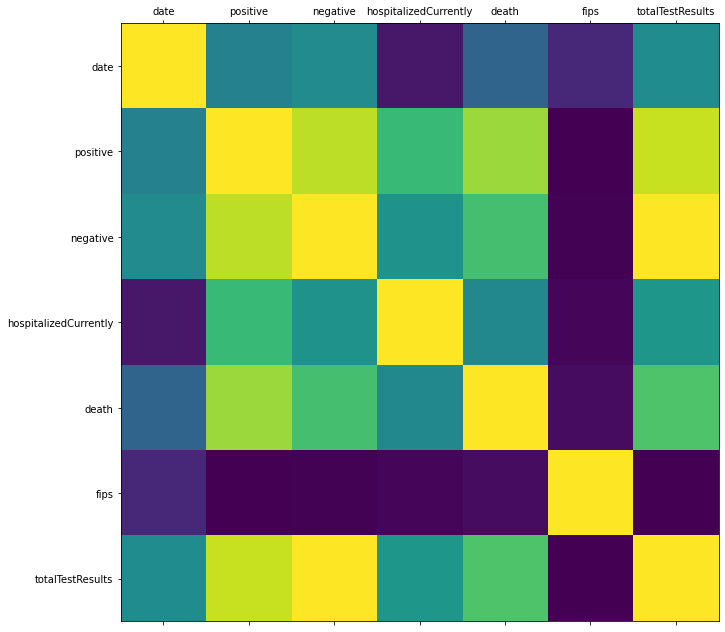

In [30]:
plot_corr(df_states)

In [39]:
df_states.drop(columns=['negative'],inplace=True)

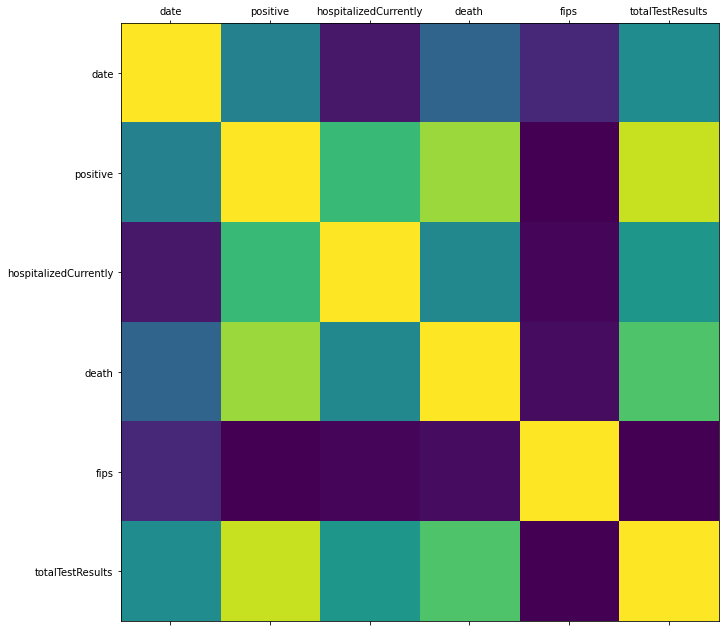

In [40]:
plot_corr(df_states)

In [ ]:
# CASES: Create rolling three-day averages of the number of daily positive cases<br>
# INFECTION RATE: Create rolling three-day averages of the number of daily positive tests as a percent of total tests<br>
# MORTALITY: Create rolling three-day averages of the number of daily death counts
# HOSPITALIZATIONS: Create rolling three-day averages of the number of daily hospitalized cases<br>
# TESTING CAPACITY: Create rolling three-day averages of the number of daily tests